In [46]:
from gurobipy import *
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [121]:
#load data
composition = pd.read_csv('Pb1_composition.csv', index_col=None, header=None).values #1007*10

energy = pd.read_csv('Pb1_energy.csv', index_col=None, header=None).values #1007

mapping = pd.read_csv('Pb1_mapping.csv', index_col=None, header=None).values # 1007*6 

price = pd.read_csv('Pb1_price.csv', index_col=None, header=None).values #1007 

lower_bound  = [0.011, 0.003, 0.35, 0.04, 0.009, 0.005]
upper_bound = [0.251, 0.087, 0.75, 0.33, 0.102, 0.085]
min_intake = [20000, 400, 7, 6.5, 0.57, 20, 0.7, 1.1, 0.05, 0.0005]

In [122]:
f = range(len(energy)) #i = 1007 
n = range(len(min_intake)) # j  = 10, nutrition intake 

g = range(len(lower_bound))# k  = 6 food group

In [123]:
# Setting up model object
m = Model("nutrition")

### Setting up Decision Variables ###
# food amount intake
x = m.addVars(f, lb = 0.0)


# Set up two variables to capture the two objectives 
z1 = m.addVar(lb = 0.0) # for energya intake
z2 = m.addVar(lb = 0.0) # for food cost


setupIntake = LinExpr() # nurtition intake
for i in f:
    setupIntake += int(energy[i]) * x[i]

foodCost = LinExpr() # food cost
for i in f:
    foodCost += int(price[i]) * x[i]
        
        
m.addConstr(z1 == setupIntake)
m.addConstr(z2 == foodCost)
  
### Constraints ###
'''
1. All  nutrition intake must above the WHO minimum requirement
2. Energy intake must above the lower bound of proportion intake for each group 
3. Energy intake must below the upper bound of proportion intake '''

# First constrin 
for j in n:
    m.addConstr(sum(x[i]*composition[i,j] for i in f) >= min_intake[j])

for i in f: 
    m.addConstr(x[i] >= 0)
    
#Second and their Constrains
for k in g:
    m.addConstr(sum(x[i] * mapping[i, k] * int(energy[i]) for i in f) >= lower_bound[k]*sum(
    x[i]*int(energy[i]) for i in f))
    m.addConstr(sum(x[i] * mapping[i, k] * int(energy[i]) for i in f) <= upper_bound[k]*sum(
    x[i]*int(energy[i]) for i in f))

In [124]:
#weighted approach 
alpha_values = [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]
intake = np.zeros([len(alpha_values), 2])
intake

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [125]:
for iteration in range(len(intake)):
    
    alpha = alpha_values[iteration]
    
    m.setObjective(alpha * z1 + (1 - alpha) * z2, GRB.MINIMIZE)

    
    # Solve
    m.optimize()

            
    # Reporting the breakdown of the cost
    print ("total nuetrition intake: ", setupIntake.getValue())
    print ("total food cost: ", foodCost.getValue())
    
    intake[iteration, 0] = z1.x
    intake[iteration, 1] = z2.x

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1031 rows, 1009 columns and 22978 nonzeros
Model fingerprint: 0xa423c529
Coefficient statistics:
  Matrix range     [1e-05, 8e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-04, 2e+04]
Presolve removed 1009 rows and 33 columns
Presolve time: 0.03s
Presolved: 22 rows, 976 columns, 19816 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.114502e+02   0.000000e+00      0s
      12    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 12 iterations and 0.05 seconds
Optimal objective  0.000000000e+00
total nuetrition intake:  885.0104162191745
total food cost:  0.0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1031 rows, 100

total food cost:  2.0219980318568087
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1031 rows, 1009 columns and 22978 nonzeros
Coefficient statistics:
  Matrix range     [1e-05, 8e+04]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-04, 2e+04]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3238726e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds
Optimal objective  1.323872586e+02
total nuetrition intake:  133.70407939491005
total food cost:  2.0219980318568087
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1031 rows, 1009 columns and 22978 nonzeros
Coefficient statistics:
  Matrix range     [1e-05, 8e+04]
  Objective range  [1e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]

[[8.85010416e+02 0.00000000e+00]
 [1.50602008e+02 0.00000000e+00]
 [1.47682246e+02 2.64326194e-02]
 [1.37144914e+02 2.82571020e-01]
 [1.37069849e+02 2.93398601e-01]
 [1.36272215e+02 5.27469502e-01]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]
 [1.33704079e+02 2.02199803e+00]]


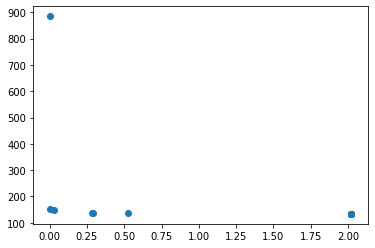

In [126]:
# Plot Pareto frontier
print(intake)
plt.scatter(intake[:,1],intake[:,0])
plt.show()

In [127]:
# Setting up model object
m2 = Model("Goal Programming")

### Setting up Decision Variables ###
# food amount intake
x = m2.addVars(f, lb = 0.0)


# Set up two variables to capture the two objectives 
z1 = m2.addVar(lb = 0.0) # for energya intake
z2 = m2.addVar(lb = 0.0) # for food cost


setupIntake = LinExpr() # nurtition intake
for i in f:
    setupIntake += int(energy[i]) * x[i]

foodCost = LinExpr() # food cost
for i in f:
    foodCost += int(price[i]) * x[i]
        
        
m2.addConstr(z1 == setupIntake)
m2.addConstr(z2 == foodCost)
  
### Constraints ###
'''
1. All  nutrition intake must above the WHO minimum requirement
2. Energy intake must above the lower bound of proportion intake for each group 
3. Energy intake must below the upper bound of proportion intake '''

# First constrin 
for j in n:
    m2.addConstr(sum(x[i]*composition[i,j] for i in f) >= min_intake[j])

for i in f:
    m2.addConstr(x[i] >= 0)
#Second and their Constrains
for k in g:
    m2.addConstr(sum(x[i] * mapping[i, k] * int(energy[i]) for i in f) >= lower_bound[k]*sum(
    x[i]*int(energy[i]) for i in f))
    m2.addConstr(sum(x[i] * mapping[i, k] * int(energy[i]) for i in f) <= upper_bound[k]*sum(
    x[i]*int(energy[i]) for i in f))

In [128]:
m2.addConstr(foodCost <=0.5)

m2.setObjective(setupIntake, GRB.MINIMIZE)

m2.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1032 rows, 1009 columns and 23687 nonzeros
Model fingerprint: 0x19d162a3
Coefficient statistics:
  Matrix range     [1e-05, 8e+04]
  Objective range  [1e+00, 9e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-04, 2e+04]
Presolve removed 1009 rows and 18 columns
Presolve time: 0.12s
Presolved: 23 rows, 991 columns, 20749 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.137943e+02   0.000000e+00      0s
      31    1.3634826e+02   0.000000e+00   0.000000e+00      0s

Solved in 31 iterations and 0.14 seconds
Optimal objective  1.363482596e+02


In [129]:
print ("total nuetrition intake: ", setupIntake.getValue())
print ("total food cost: ", foodCost.getValue())

total nuetrition intake:  136.3482595947646
total food cost:  0.5


In [132]:
for i in f:
    if x[i].x == 0:
        pass
    else: 
        print('optinal diet has', x[i].x, 'grams of ', i+1, 'food item')

optinal diet has 0.00639955337135365 grams of  46 food item
optinal diet has 0.030678237284447997 grams of  217 food item
optinal diet has 0.06850381230352068 grams of  236 food item
optinal diet has 0.7045361701343638 grams of  352 food item
optinal diet has 0.11040705791659042 grams of  432 food item
optinal diet has 0.147403523886232 grams of  462 food item
optinal diet has 0.0411483880042584 grams of  727 food item
optinal diet has 0.0023939928505793337 grams of  792 food item
optinal diet has 0.04249779170372533 grams of  914 food item
optinal diet has 0.0119883540712115 grams of  969 food item
optinal diet has 0.011960373648663567 grams of  992 food item
